# MN-curves

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, 'libraries')
import MNcurve as MN
import sections as sect
import materials as mat
import utils

## Define geometry

## Define materials

Refer to _materials.ipynb_ to learn how the material properties were defined for the D-Frame system.

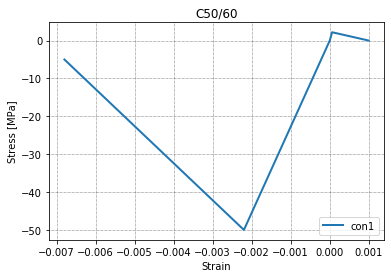

In [2]:
conMat = mat.con1('C50_60', 50, 250, epsilon_t2 = 0.001, fc2_factor = 0.1, ft_factor = 0.5, 
                 characteristic = True, plotting=True,title="C50/60")

In [3]:
conMat.data_frame()

,ID,$$h[mm]$$,$$f_{c1}[MPa]$$,$$f_{c2}[MPa]$$,$$f_{t}[MPa]$$,$$E_{c0}[MPa]$$,$$E_{c1}[MPa]$$,$$E_{c2}[MPa]$$,$$E_{t1}[MPa]$$,$$E_{t2}[MPa]$$,$$G_{f}[N/mm]$$,$$G_{c}[N/mm]$$,$$e_{c1}$$,$$e_{c2}$$,$$e_{t1}$$,$$e_{t2}$$,$$alpha$$
C50_60,C50_60,250,50,5.0,2.2,38600,22700,-9800,38600,-2300,0.152,38.0,0.0022,0.0068,6e-05,0.001,0.7


In [4]:
# conMat = mat.stl1('concrete stl1', 11111, 15, 15, 0.0035,title="Concrete",plotting=True,tension=False)
# # conMat = mat.EC2con('concrete EC2', 30*0.85/1.5, 0.0035,plotting=True,title="Concrete",tension=False)
# conMat.data_frame()

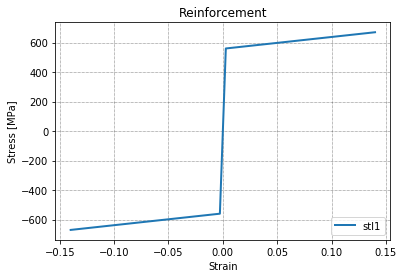

,ID,$$E_{1}[MPa]$$,$$E_{2}[MPa]$$,$$f_{y}[MPa]$$,$$f_{u}[MPa]$$,$$e_{y}$$,$$e_{u}$$,$$mu$$
reinforcement,reinforcement,205000,801.3,560,670,0.00273,0.14,0.0039088


In [5]:
reinfMat = mat.stl1('reinforcement', 205000, 560, 670, 0.14,title="Reinforcement",plotting=True,tension=True)
reinfMat.data_frame()

In [6]:
# reinfMat = mat.stl1('reinf plastic', 200000, 435, 435, 0.05,title="Reinforcement",plotting=True,tension=True)
# reinfMat.data_frame()

## Define sections

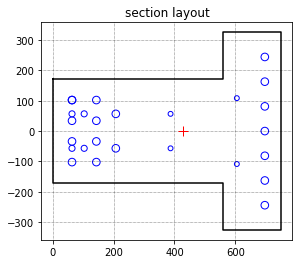

In [7]:
reinf_sect = [[7, 25, 697],[2, 16, 605],[2,16,387],[2,25,207],[4,25,143],[2,20,103],[2,20,63],[4,25,63]]
section=sect.rcts(190,560,650,340,reinf_sect)

In [8]:
# reinf_sect = [[2, 20, 40],[2,20,260]]
# section=sect.rss(300,300,reinf_sect, plotting = True)

In [9]:
# reinf_sect = [[5, 32, 600],[2,25,50]]
# section=sect.rss(500,650,reinf_sect, plotting = True)

## Strains and stresses within section

Positive moment indicates tension in top of the section and compression close to 0 x-coordinate.

In [10]:
MNclass=MN.MNclass(conMat,reinfMat,section)

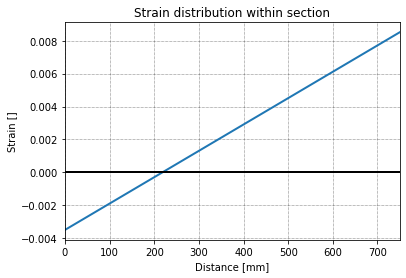

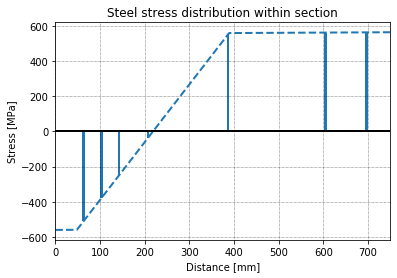

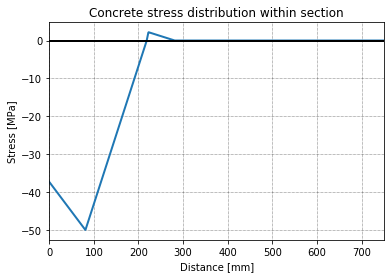

Total axial force: -2053 kN
Total moment: 1964 kNm


In [11]:
# f_tot,m_tot,f_s,f_con,eps_s,sigma_s=MNclass.calc(eps0=0.04,epsH=-0.0035, plotting=True,n_layers=800)
#f_tot,m_tot,f_s,f_con,eps_s,sigma_s=MNclass.calcXH(epsH=-0.0035,x_NA=90, plotting=True,n_layers=800)
#f_tot,m_tot,f_s,f_con,eps_s,sigma_s=MNclass.calcXH(epsH=reinfMat.epsilon_u,x_NA=1E99, plotting=True, n_layers=200)
f_tot,m_tot,f_s,f_con,eps_s,sigma_s=MNclass.calcX0(eps0=-0.0035,x_NA=218.5, plotting=True,n_layers=1000)

## MN cuve

libraries\utils.py:103: RuntimeWarning: invalid value encountered in greater_equal
  in_range= (T[0,:] >=0) & (T[1,:] >=0) & (T[0,:] <=1) & (T[1,:] <=1)
libraries\utils.py:103: RuntimeWarning: invalid value encountered in less_equal
  in_range= (T[0,:] >=0) & (T[1,:] >=0) & (T[0,:] <=1) & (T[1,:] <=1)


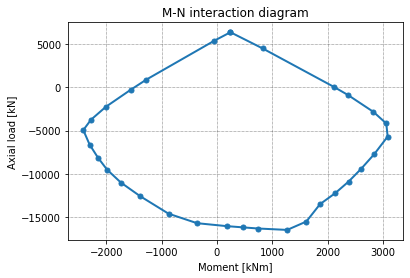

In [20]:
mnInteraction = MNclass.mnCurve(xRatio=[0.05,0.16,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.3,2,5,1E99],n_layers=100,epsU=-0.0035,reverseMoment=True)